**HOTEL REVIEWS**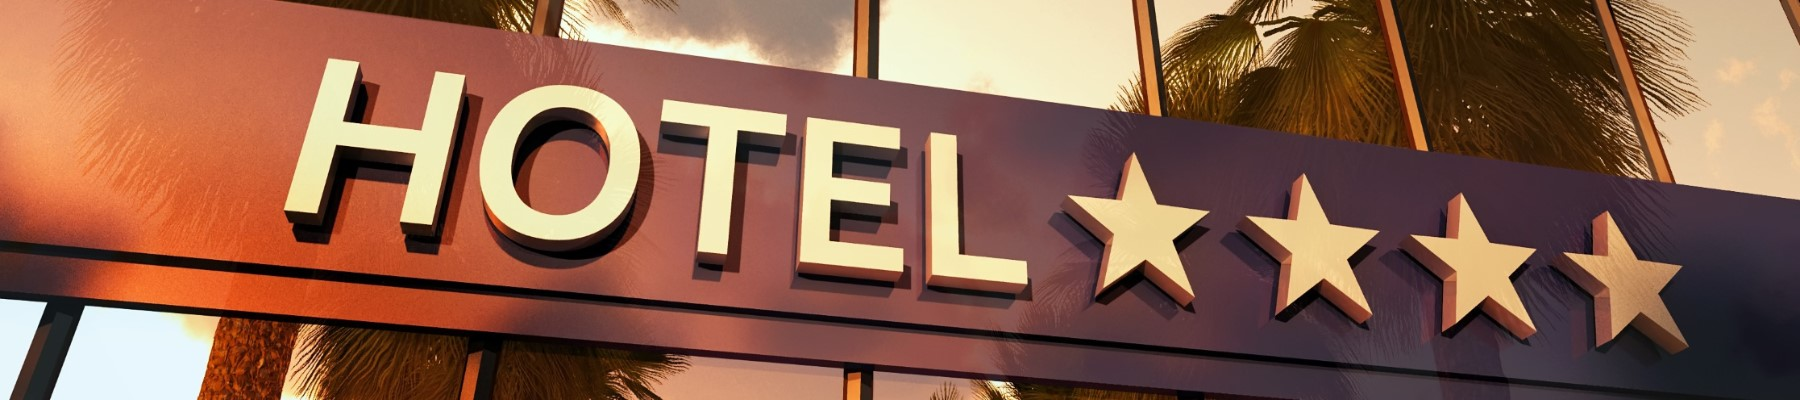




# Discovery

Nel dataset riportato qui sotto possiamo trovare l’elenco di 1.000 hotel, le relative recensioni, la posizione e il rating.

Questo dataset permette di confrontare il rating medio per Stato e la correlazione di alcune parole o topic con il rating finale dell’hotel.

Quali sono i concetti vincenti per avere un hotel di successo?
Su cosa si dovrebbe concentrare il tuo hotel se volesse incrementare il proprio rating?
Quali dati possono aiutare il team del tuo hotel a capire a fondo il settore in cui opera e a formulare delle strategie efficaci?
Cercherò di farmi della domande a cui rispondere e creare delle correlazioni tra tabelle.

Sono stato assente durante il lavoro di gruppo di lunedi, quindi l'ho svolto da solo. Il dataset l'ho trovato su kaggle.

# Data Description & Cleaning

In [2]:
# Importazione moduli necessari
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Questa è una lista di 1,000 hotels e le loro relative relative recensioni. Il dataset include location, name, rating, review data, title, username, exc.

In [6]:
#Panoramica del Database
#Inizio ad annotarmi le possibili correlazioni tra colonne, controllo quelle inutili e se ci sono dati mancanti
df = pd.read_csv('7282_1.csv')
df

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
35908,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
35909,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC
35910,3747 29th St S E,"Hotels-Apartment,Corporate Lodging,Hotels,Lodging",Grand Rapids,US,42.909480,-85.573590,Extended Stay America Grand Rapids - Kentwood,49512,MI,NaN,2015-12-01T19:40:54Z,NaN,NaN,0.0,to share your opinion of this businesswith YP ...,NaN,NaN,write a review,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35890 non-null  object 
 15  reviews.title      

- Controllo i nomi delle colonne e i datatype.
Le due colonne reviews.id e .reviews.doRecommend sono vuote. Anche reviews.dateAdded e l'username non hanno dati utili e analizzabili.
Postal Code è strettamente collegato alla città, quindi mantengo solo quest'ultima.

In [11]:
#elimino colonne vuote e inutili ai fini dell'analisi
df = df.drop('reviews.id', axis=1)
df = df.drop('reviews.doRecommend', axis=1)
df = df.drop('reviews.dateAdded', axis=1)
df = df.drop('reviews.username', axis=1)
df = df.drop('postalCode', axis=1)

In [12]:
#rinomino i nomi delle colonne
vecchi_nomi = ['reviews.date', 'reviews.rating', 'reviews.title', 'reviews.text','reviews.userCity','reviews.userProvince']
nuovi_nomi = ['date', 'rating', 'title', 'text', 'userCity','userProvince']
df.rename(columns=dict(zip(vecchi_nomi, nuovi_nomi)), inplace=True)

In [13]:
df.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'province', 'date', 'rating', 'text', 'title', 'userCity',
       'userProvince'],
      dtype='object')

In [43]:
#Andiamo ad analizzare se ci sono valori mancati nelle colonne e la loro somma:
df.isnull().sum()

address             0
categories          0
city                0
country             0
latitude           86
longitude          86
name                0
province            0
date              259
rating            862
text               22
title            1622
userCity        19649
userProvince    18394
dtype: int64

Abbiamo dati mancanti in queste colonne.

- Cancello tutte le righe con i rating mancanti, è il parametro più importante, ed essendo un'opinione strettamente personale non ritengo giusto calcolarla in base ad altri fattori come media o mediana.

- Dentro le colonne userCity e userProvince, più della metà dei dati sono mancanti,
sicuramente perchè veniva dato come facoltativo l'inserimento. Analizzerò quelli presenti, visto che ipotizzarle randomly non servirebbe a nulla.

- La colonna Categories presenta tantissime categorie diverse, quasi 300, tutte disordinate, scritte male, senza un filo logico. Sono una serie di subcategorie una attaccata all'altra. Ho deciso pertanto di non implementarla nell'analisi.

- Country è sempre US

- Latitude e Longitude le riempio con i valori medi delle colonne.

- Per quanto riguarda il titolo e il testo, sono colonne abbastanza irrilevanti, che ho deciso di mantenere solo per completezza e curiosità. Non presentano dati adatti a fare grafici o analisi.

- La colonna date presenta la data completa e l'ora tutto unito, andrò successivamente a separarle in nuove colonne

In [73]:
#cancello tutte le righe nulle nella colonna rating
df_clean = df.dropna(subset=['rating'], inplace = True)

In [96]:
# cancello tutte le righe con valore rating '0' perchè sono bozze di recensione non completate
df_clean = df.drop(df[df['rating'] == 0].index, inplace=True)

In [7]:
#riempio queste colonne con la media, sono hotel con localizzazione mancante
media_colonna = df['latitude'].mean()
df_riempimento_media = df['latitude'].fillna(media_colonna, inplace= True)

In [9]:
media_colonna = df['longitude'].mean()
df_riempimento_media = df['longitude'].fillna(media_colonna, inplace= True)

In [130]:
#cancello le righe con valori della data nulli perchè sono recensioni con errori negli altri campi, o duplicati con una sola lettera di differenza.
#ho controllato con questo codice "df[df['date'].isna()]"
df.dropna(subset=['date'], inplace = True)

In [ ]:
# Ho creato 4 nuove colonne con la data separata in nuova_data, ora, giorno, mese, anno

In [292]:
df['Date'] = pd.to_datetime(df['date'])
df['nuova_data'] = [d.date() for d in df['Date']]
df['ora'] = [d.time() for d in df['Date']]
df['giorno'] = pd.DatetimeIndex(df['nuova_data']).day
df['mese'] = pd.DatetimeIndex(df['nuova_data']).month
df['anno'] = pd.DatetimeIndex(df['nuova_data']).year
df = df.drop(['Date'],axis=1)

In [299]:
#Final
df.isnull().sum()

address             0
categories          0
city                0
country             0
latitude            0
longitude           0
name                0
province            0
date                0
rating              0
text               20
title             630
userCity        18529
userProvince    17257
nuova_data          0
ora                 0
giorno              0
mese                0
anno                0
dtype: int64

In [300]:
# Elimino duplicati
df.drop_duplicates(inplace=True)

In [301]:
df.duplicated().sum()

0

In [308]:
df.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'province', 'date', 'rating', 'text', 'title', 'userCity',
       'userProvince', 'nuova_data', 'ora', 'giorno', 'mese', 'anno'],
      dtype='object')

In [302]:
#dataset aggiornato
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34599 entries, 0 to 35909
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       34599 non-null  object 
 1   categories    34599 non-null  object 
 2   city          34599 non-null  object 
 3   country       34599 non-null  object 
 4   latitude      34599 non-null  float64
 5   longitude     34599 non-null  float64
 6   name          34599 non-null  object 
 7   province      34599 non-null  object 
 8   date          34599 non-null  object 
 9   rating        34599 non-null  float64
 10  text          34579 non-null  object 
 11  title         33969 non-null  object 
 12  userCity      16070 non-null  object 
 13  userProvince  17342 non-null  object 
 14  nuova_data    34599 non-null  object 
 15  ora           34599 non-null  object 
 16  giorno        34599 non-null  int64  
 17  mese          34599 non-null  int64  
 18  anno          34599 non-nu

In [303]:
#Verifico il numero di righe e di colonne presenti nel database dopo la pulizia
df.shape

(34599, 19)

In [304]:
#panoramica valori numerici presenti
df.describe()

,latitude,longitude,rating,giorno,mese,anno
count,34599.000000,34599.000000,34599.000000,34599.000000,34599.000000,34599.000000
mean,37.272866,-85.728404,3.816119,15.791208,6.663979,2014.936096
std,7.010293,33.390130,1.370777,8.877280,2.953957,1.538301
min,-25.436750,-166.559040,1.000000,1.000000,1.000000,2002.000000
25%,33.802300,-104.983568,3.000000,8.000000,4.000000,2015.000000
50%,37.933273,-86.822972,4.000000,16.000000,7.000000,2015.000000
75%,41.672491,-77.072470,5.000000,24.000000,9.000000,2016.000000
max,63.877674,115.164407,10.000000,31.000000,12.000000,2017.000000


#Data Exploration & Visualization

In [ ]:
#Analizzando i dati validi della seguente colonna, vediamo che la maggior parte dei turisti proviene da grandi città,
#ma li troviamo in cima alla lista, proprio perchè hanno milioni di abitanti.
#é una colonna che non da spazio a ulteriori analisi, anche perchè metà dei campi erano nulli e altri erano errati.
df['userCity'].value_counts()

Chicago          204
Phoenix          183
New York City    151
Tempe            140
Weipa            125
                ... 
Silverwood         1
Gladstone          1
Warrior            1
Martinsville       1
Central NH         1
Name: userCity, Length: 2866, dtype: int64

In [ ]:
#stesso discorso qui
df['userProvince'].value_counts()

CA                      1165
TX                       944
FL                       893
NY                       822
IL                       772
                        ... 
a                          1
Suidbury MA                1
Las Vegas                  1
Germany                    1
Maplewood New Jersey       1
Name: userProvince, Length: 648, dtype: int64

In [187]:
#Città con più recensioni, Alexandria la prima
df['city'].value_counts()[:10]

Alexandria        1185
Virginia Beach     752
Newburgh           714
San Antonio        689
Biloxi             392
Erie               356
Seattle            353
New Orleans        348
Waterville         335
West Yarmouth      332
Name: city, dtype: int64

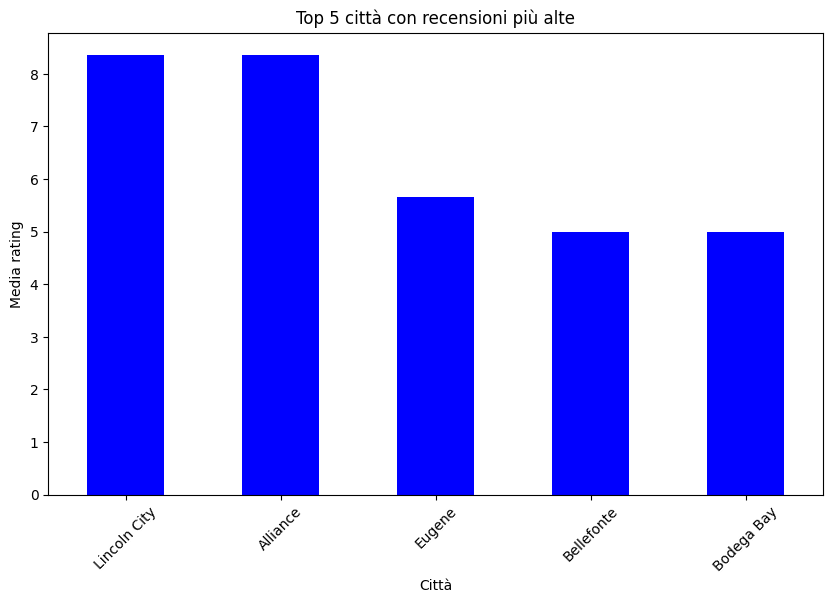

In [334]:
#Città con recensioni più alte
top_cities =  df.groupby('city')['rating'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='blue')
plt.xlabel('Città')
plt.ylabel('Media rating')
plt.title('Top 5 città con recensioni più alte')
plt.xticks(rotation=45)
plt.show()

#Vediamo che le città col rating medio più alto non sono quelle col maggior numero di recensioni

In [192]:
#Province con più recensioni
df['province'].value_counts()[:10]

CA    3793
VA    2768
TX    1779
FL    1396
NY    1219
GA    1208
PA    1030
MI     903
CO     833
OH     675
Name: province, dtype: int64

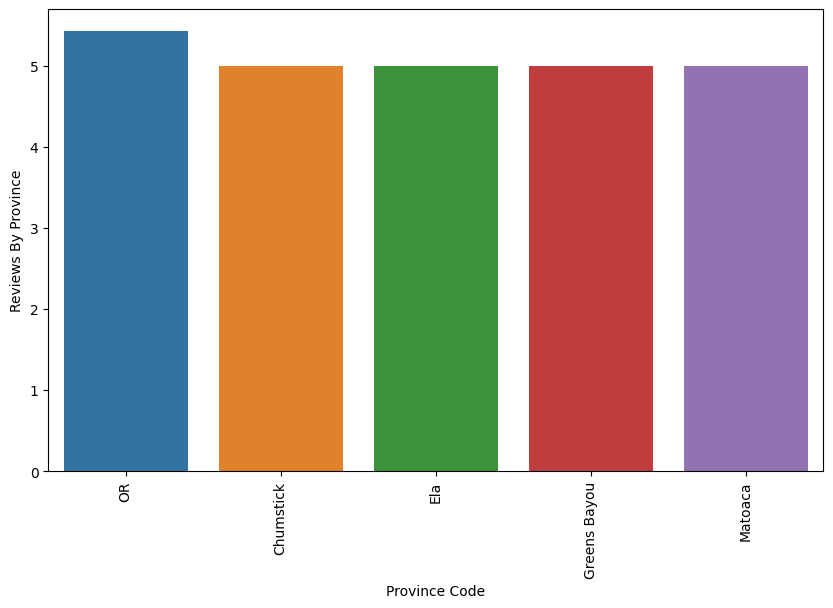

In [256]:
#Province con più recensioni più alte in media
Province_Counts = df.groupby('province')['rating'].mean().nlargest(5)
sns.barplot(x= Province_Counts.index, y= Province_Counts.values)
plt.ylabel('Reviews By Province')
plt.xlabel('Province Code')
plt.xticks(rotation='vertical')
plt.show()
#Vediamo anche qui che le province col rating medio più alto non sono quelle col maggior numero di recensioni


Possiamo notare come la parte della costa est degli stati uniti è di gran lunga la più visitata. Eccezion fatta per la California, che primeggia di gran lunga.


In [ ]:
#Hotel più recensiti, The Alexandrian il primo.
df['name'].value_counts()[:10]

The Alexandrian, Autograph Collection          1185
Howard Johnson Inn - Newburgh                   714
Americas Best Value Inn                         556
Fiesta Inn and Suites                           537
Ip Casino Resort Spa                            392
Best Western Plus Waterville Grand Hotel        335
Comfort Suites                                  326
Best Western of Long Beach                      317
Hampton Inn Virginia Beach Oceanfront North     301
Plaza Hotel and Casino - Las Vegas              289
Name: name, dtype: int64

In [ ]:
#Hotel con recensioni medie più alte
#Tre strutture staccano nettamente dalle altre, Pelican Shores Inn la prima
df.groupby('name')['rating'].mean().reset_index().sort_values(by='rating', ascending=False).round(2)

,name,rating
440,Pelican Shores Inn,8.37
340,Hyatt Regency Kathmandu,8.35
83,Candlewood Suites Eugene Springfield,8.24
251,Hampton Inn Virginia Beach Oceanfront North,5.42
290,Holiday Inn Express Hotel and Suites Va Beach ...,5.31
...,...,...
70,Breakers Hotel,1.00
584,Travelodge,1.00
76,Budget Inn South,1.00
77,Budget Inn-santa Maria,1.00


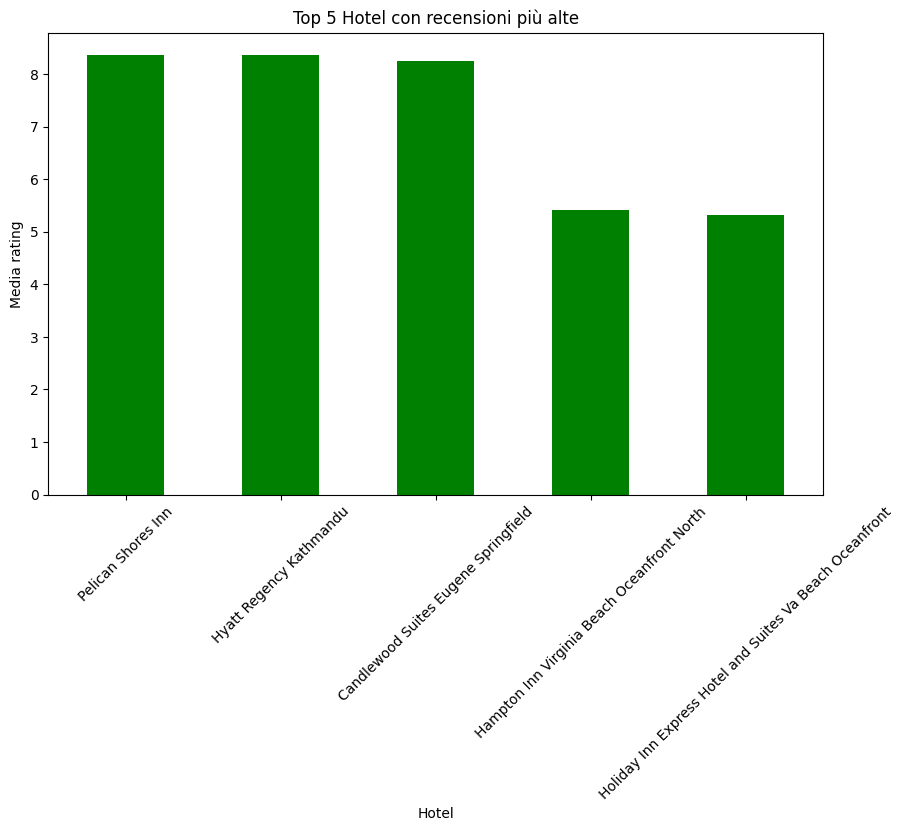

In [ ]:

top_hotels =  df.groupby('name')['rating'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
top_hotels.plot(kind='bar', color='green')
plt.xlabel('Hotel')
plt.ylabel('Media rating')
plt.title('Top 5 Hotel con recensioni più alte')
plt.xticks(rotation=45)
plt.show()

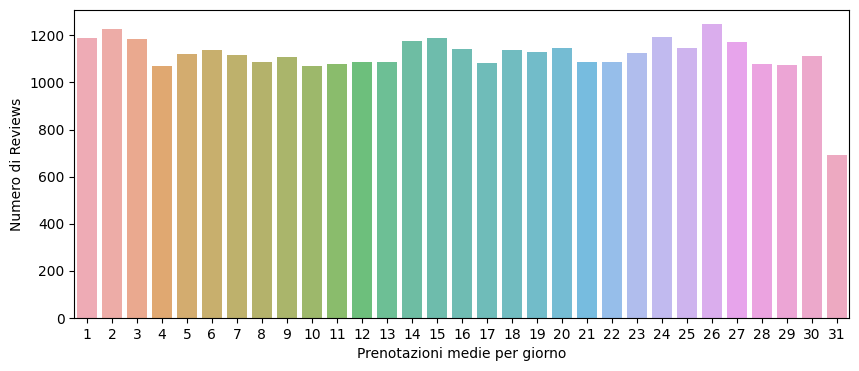

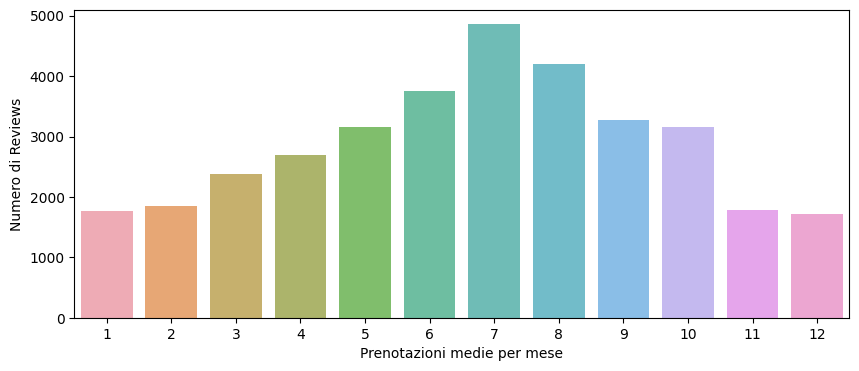

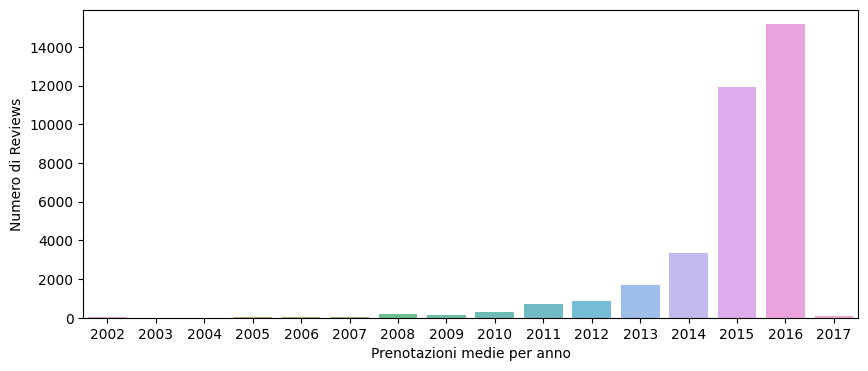

In [307]:
#Giorni, mesi e anno con più prenotazioni

Review_Day_Count = df['giorno'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x= Review_Day_Count.index, y = Review_Day_Count.values, alpha=0.8)
plt.ylabel("Numero di Reviews")
plt.xlabel("Prenotazioni medie per giorno")
plt.show()
#ogni 7 giorni vediamo un rialzo, vuol dire che le prenotazioni aumentano
#nel weekend

Reviews_Count_Month = df['mese'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x = Reviews_Count_Month.index, y = Reviews_Count_Month.values, alpha=0.8)
plt.ylabel("Numero di Reviews")
plt.xlabel("Prenotazioni medie per mese")
plt.show()

# i mesi migliori sono quelli estivi, luglio e agosto soprattutto
Reviews_Year = df['anno'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x =Reviews_Year.index, y =  Reviews_Year.values, alpha=0.8)
plt.ylabel("Numero di Reviews")
plt.xlabel("Prenotazioni medie per anno")
plt.show()
# il database si ferma a inizio 2017, la maggior parte dei dati sono dati del 2015-2016.
# possiamo notare un aumento sempre maggiore dei viaggi
# di anno in anno dal 2008 al 2016.

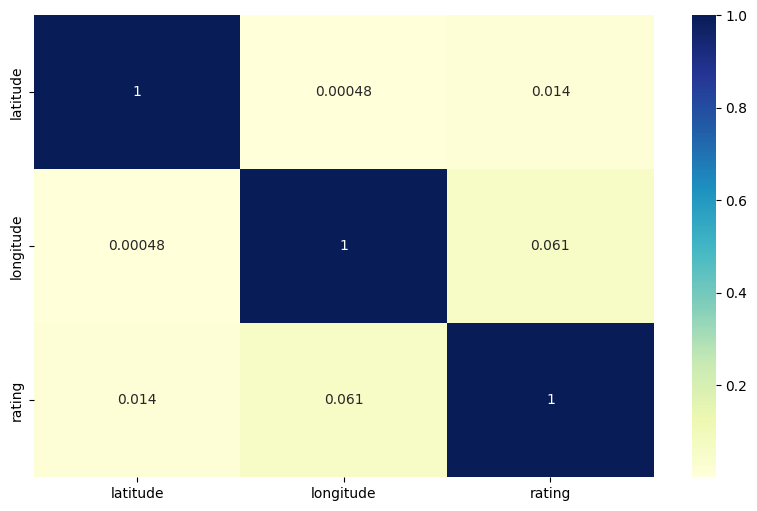

In [ ]:
#Heatmap dei valori numerici (latitude, longitude, rating)
corr_matrix = df[['latitude','longitude', 'rating']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

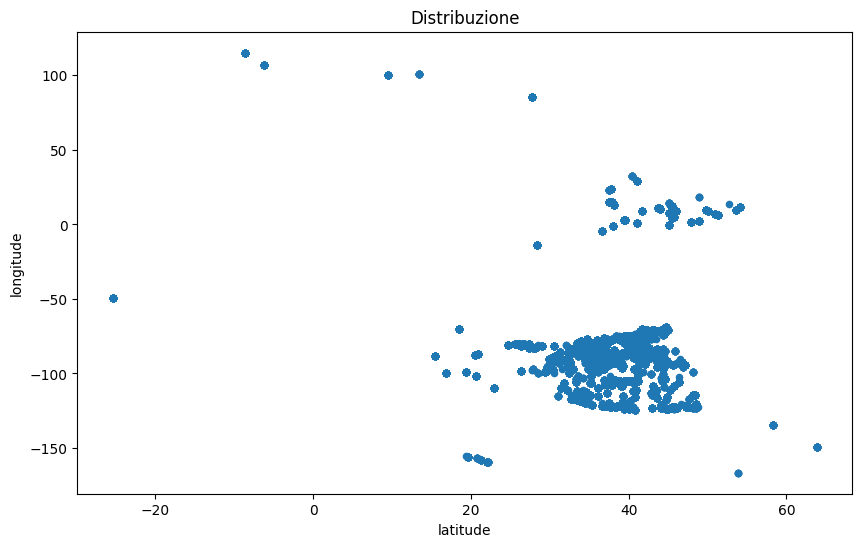

In [318]:
# Possiamo notare come la maggior parte delle strutture si trovi vicina, nella della costa est della nazione.
# Gli outliers sono hotel della zona californiana
df.plot(x='latitude',y='longitude',kind='scatter',title='Distribuzione')
plt.rcParams['figure.figsize'] = [10, 6]


# Conclusioni

Quali sono i concetti vincenti per avere un hotel di successo? Su cosa si dovrebbe concentrare il tuo hotel se volesse incrementare il proprio rating? Quali dati possono aiutare il team del tuo hotel a capire a fondo il settore in cui opera e a formulare delle strategie efficaci?

Queste sono alcune idee di una strategia di marketing per un eco-hotel negli Stati Uniti, che si concentra sul turismo sostenibile e sull'armonia con la natura:

- **Posizionamento del brand**: Sottolineare il concetto di "fuga dalla città" e "ricarica nella natura" per attrarre i turisti provenienti da grandi città come New York e Los Angeles, perchè la maggior parte delle prenotazioni è stata effettuata dalle grandi metropoli. Metterei in evidenza la tranquillità e la bellezza del tuo eco-hotel come una destinazione ideale per una pausa rigenerante.

- **Influencer marketing**: Collaborerei con influencer locali o influencer noti nel settore del turismo sostenibile per creare contenuti sponsorizzati che mettano in evidenza le esperienze positive vissute presso l'eco-hotel. Questo può aumentare la visibilità del brand e attrarre l'attenzione di potenziali clienti.

- **Offerte e pacchetti tematici**: Creare offerte speciali e pacchetti tematici, soprattutto nei mesi estivi dove c'è più richiesta, che si concentrino sul turismo sostenibile e sull'esplorazione della natura. Ad esempio, potrei offrire pacchetti "Escursione ecologica nel weekend" o "Esperienze di agricoltura biologica" che attirino i turisti desiderosi di unire il divertimento alla consapevolezza ambientale.

- **Collaborazioni locali**: Stabilirei collaborazioni con altre aziende locali che condividono la tua visione di sostenibilità. Ad esempio, potrei lavorare con produttori locali di cibo biologico per offrire pasti sani e a km zero ai tuoi ospiti. Queste collaborazioni possono aiutare a rafforzare la reputazione come destinazione turistica sostenibile.

- **Eventi tematici e workshop**: Organizzare nel weekend, ovvero il periodo in cui si attirano maggiori clienti, degli eventi tematici sul turismo sostenibile, come workshop di riciclo o conferenze sull'ecologia, che attirino sia gli ospiti dell'hotel che la comunità locale. Questi eventi possono contribuire a creare un senso di comunità intorno al brand e a posizionare l'eco-hotel come leader nel settore.

